In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.image as mpimg
from subprocess import Popen
import glob,os,time,sys,math,shutil
import numpy as np
import re
import pandas as pd
from IPython.display import display,clear_output
from matplotlib.ticker import FormatStrFormatter
from pylab import rcParams
import seaborn as sns
import matplotlib as mpl
print(np.version.version)

print(sns.__version__)
timestr=time.strftime("%m%d")
print(timestr)
from matplotlib import colormaps
list(colormaps)

1.25.2
0.12.2
0917


['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [2]:
def calc_mean(df):
    avg_NE=df['NE'].sum()/(len(df))
    return avg_NE
def calc_varianvce(df):
    var_NE=df['NE'].var()
    return var_NE
def calc_std(df):
    std_NE=df['NE'].std()
    return std_NE
def calc_rmse_meanNE(df):
    return calc_std(df)/(np.sqrt(len(df.shape[0])))
def T4_count(df):
    count_T4=df['NE'].value_counts().get(120, 0)/len(df['NE'])
    return count_T4
def NCD_Hex_mean(df):
    df['NCD']=df['NCD_T4']+df['NCD_T3']+df['NCD_Hex']
    df['NCD_ratio']=df['NCD_Hex'].div(df['NCD'])
    return df['NCD_ratio'].mean()
def NCD_Hex_std(df):
    df['NCD']=df['NCD_T4']+df['NCD_T3']+df['NCD_Hex']
    df['NCD_ratio']=df['NCD_Hex'].div(df['NCD'])
    return df['NCD_ratio'].std()
def T3_count(df):
    count_T3=df['NE'].value_counts().get(90, 0)/len(df['NE'])
    return count_T3

In [6]:
filenames_all=glob.glob("high_gdd/final_energy/*dat")
#print(filenames_all)
plot_heatdata=pd.DataFrame(columns=["gdrug", "kd", "NE_variable"])
for file in filenames_all[0:5]:
    #print(file)
    paras=file.split("5.5_Rgdrug-")[1]
    gdrug=paras.split("_")[0]
    print(gdrug)
    datafile0=pd.read_csv(file)
    #print(datafile0['NE'].iloc[i].type)
    datafile0=datafile0.drop(datafile0[datafile0['NE']==3].index)
    kd=paras.split("-")[1]
    kd=kd.split(".dat")[0]
    print(kd)
    #print(sum)
    mean_edge=calc_mean(datafile0)
    #print(mean_edge/len(datafile0))
    mean_NE_std=calc_std(datafile0)
    NCD_hexratio=NCD_Hex_mean(datafile0)
    t4percent=T4_count(datafile0)
    new_row = [[float(gdrug),float(kd),NCD_hexratio]]
    nr=pd.DataFrame(new_row,columns=['gdrug', "kd",'NE_variable'])
    plot_heatdata = pd.concat([plot_heatdata,nr], ignore_index=True)
#print(plot_heatdata.head())
#plot_heatdata=plot_heatdata.groupby('gdrug').agg({'NE_variable':'mean'}).reset_index()
#print(plot_heatdata)





2.1
0.3
1.5
0.3
1.1
0.3
1.9
0.1
1.1
0.1


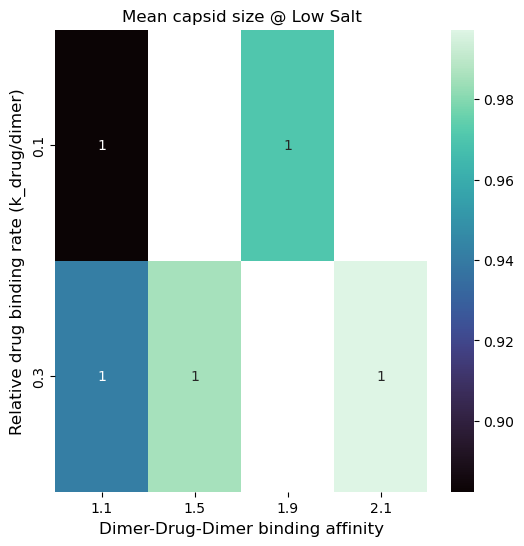

In [7]:
#plot_heatdata['kd']=plot_heatdata['gdrug']
#print(plot_heatdata)
glue = plot_heatdata.pivot(index="kd", columns="gdrug", values="NE_variable")
fig = plt.figure(figsize=(6, 6))
ax=plt.axes()
sns.heatmap(glue,ax=ax,xticklabels=1, yticklabels=1,annot=True,annot_kws={"fontsize":10},fmt='.0f',cmap='mako')
ax.set_title('Mean capsid size @ Low Salt',fontsize=12)
ax.set_ylabel('Relative drug binding rate (k_drug/dimer)',fontsize=12)
ax.set_xlabel('Dimer-Drug-Dimer binding affinity',fontsize=12)
plt.savefig('std_dev_std_salt.png')


In [5]:
filenames_all=glob.glob("stdsalt/*dat")
#print(filenames_all)
plot_heatdata=pd.DataFrame(columns=["gdrug", "kd", "NE_variable"])
for file in filenames_all:
    paras=file.split("4.5_Rgdrug-")[1]
    gdrug=paras.split("_")[0]
    #print(gdrug)
    datafile0=pd.read_csv(file)
    datafile0=datafile0.drop(datafile0[datafile0['NE']<=3].index)
    kd=paras.split("-")[1]
    kd=kd.split(".dat")[0]
    #print(kd)
    mean_edge=calc_mean(datafile0)
    mean_NE_std=calc_std(datafile0)
    NCD_hexratio=NCD_Hex_mean(datafile0)
    t4percent=T4_count(datafile0)
    new_row = [[float(gdrug),float(kd),NCD_hexratio]]
    nr=pd.DataFrame(new_row,columns=['gdrug', "kd",'NE_variable'])
    plot_heatdata = pd.concat([plot_heatdata,nr], ignore_index=True)
print(plot_heatdata.head())
#plot_heatdata=plot_heatdata.groupby('gdrug').agg({'NE_variable':'mean'}).reset_index()
#print(plot_heatdata)



   gdrug    kd  NE_variable
0   1.10  0.70     0.784981
1   0.00  0.90     0.003939
2   0.30  0.90     0.008664
3   0.01  0.90     0.005698
4   1.10  0.01     0.266923


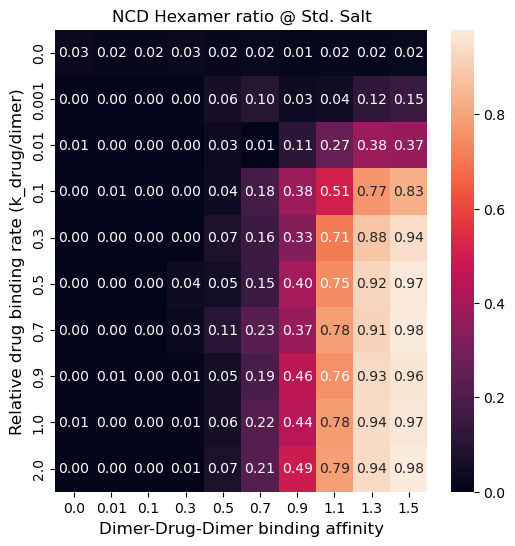

In [6]:


#plot_heatdata['kd']=plot_heatdata['gdrug']
#print(plot_heatdata)
glue = plot_heatdata.pivot(index="kd", columns="gdrug", values="NE_variable")
fig = plt.figure(figsize=(6, 6))
ax=plt.axes()
sns.heatmap(glue,ax=ax,xticklabels=1, yticklabels=1,annot=True,annot_kws={"fontsize":10},fmt='.2f')
ax.set_title('NCD Hexamer ratio @ Std. Salt',fontsize=12)
ax.set_ylabel('Relative drug binding rate (k_drug/dimer)',fontsize=12)
ax.set_xlabel('Dimer-Drug-Dimer binding affinity',fontsize=12)
plt.savefig('std_dev_std_salt.png')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-1.0.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-2.0.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.3.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.01.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.1.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.5.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.001.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.9.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.7.dat']
128
128
128
128
128
128
128
128
128
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0
   gdrug     kd    edgemean    calcstd   edgestd   t4ratio  NCDHexratio  \
6    0.9  0.001  132.085938  26.105488  2.307421  0.632812     0.078459   
3    0.9  0.010  136.312500  39.102279  3.456186  0.773438     0.059752   
4    0.9  0.100  148.296875  52.567671  4.646370  0.679688     0.097004   
2    0.9  0.300  147.812500  48.324323  4.271307  0.632812     0.111081   
5    0.9  0.500  166.843750  57.747269  5.104186  0.453125     0.179554   

   NCDHexstd  
6   0.008952  
3   0.009526  


Text(0, 0.5, '$\\langle Ndimer \\rangle$')

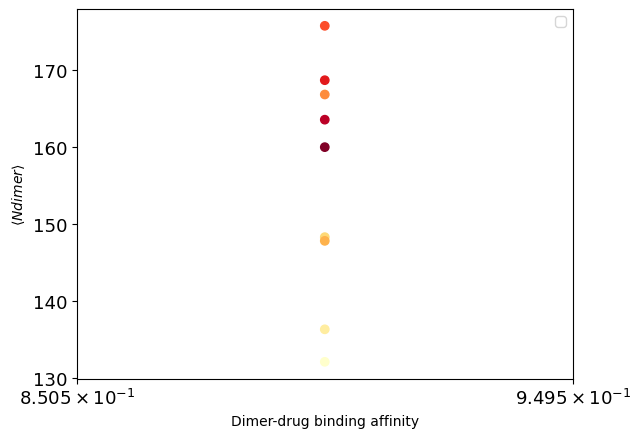

In [46]:
highsaltfiles=glob.glob("highsalt/*gdrug-0.9*.dat")
print(highsaltfiles)
stdsaltfiles=glob.glob("stdsalt/*gdrug-0.9*.dat")
plot_highdata=pd.DataFrame(columns=["gdrug", "kd", "edgemean","calcstd","edgestd","t4ratio","NCDHexratio","NCDHexstd"])
nassemble=[]
for file in highsaltfiles:
    paras=file.split("3.5_Rgdrug-")[1]
    gdrug=paras.split("_")[0]
    #print(gdrug)
    datafile0=pd.read_csv(file)
    datafile0=datafile0.drop(datafile0[datafile0['NE']<=3].index)
    kd=paras.split("-")[1]
    kd=kd.split(".dat")[0]
    #print(kd)
    mean_edge=calc_mean(datafile0)
    mean_NE_std=calc_std(datafile0)/(np.sqrt(len(datafile0['NE'])))
    NCD_hexratio=NCD_Hex_mean(datafile0)
    NCD_hexratiostd=NCD_Hex_std(datafile0)/(np.sqrt(len(datafile0['NE'])))
    print(len(datafile0['NE']))
    t4percent=T4_count(datafile0)
    calc_std2=calc_std(datafile0)
    new_row = [[float(gdrug),float(kd),mean_edge,calc_std2,mean_NE_std,t4percent,NCD_hexratio,NCD_hexratiostd]]
    nr=pd.DataFrame(new_row,columns=['gdrug', "kd",'edgemean', "calcstd",'edgestd','t4ratio','NCDHexratio','NCDHexstd'])
    plot_highdata = pd.concat([plot_highdata,nr], ignore_index=True)
    nassemble.append(len(datafile0['NE'])/128)
print(nassemble)
print(np.asarray(nassemble).mean())
plot_lowdata=pd.DataFrame(columns=["gdrug", "kd", "edgemean","calcstd","edgestd","t4ratio","NCDHexratio","NCDHexstd"])
#nassemble=nfiles+1
for file in stdsaltfiles:
    paras=file.split("4.5_Rgdrug-")[1]
    gdrug=paras.split("_")[0]
    #print(gdrug)
    datafile0=pd.read_csv(file)
    datafile0=datafile0.drop(datafile0[datafile0['NE']<=3].index)
    kd=paras.split("-")[1]
    kd=kd.split(".dat")[0]
    #print(kd)
    mean_edge=calc_mean(datafile0)
    mean_NE_std=calc_std(datafile0)/(np.sqrt(len(datafile0['NE'])))
    NCD_hexratio=NCD_Hex_mean(datafile0)
    NCD_hexratiostd=NCD_Hex_std(datafile0)/(np.sqrt(len(datafile0['NE'])))
    t4percent=T4_count(datafile0)
    calc_std2=calc_std(datafile0)
    new_row = [[float(gdrug),float(kd),mean_edge,calc_std2,mean_NE_std,t4percent,NCD_hexratio,NCD_hexratiostd]]
    nr=pd.DataFrame(new_row,columns=['gdrug', "kd",'edgemean','calcstd','edgestd','t4ratio','NCDHexratio','NCDHexstd'])
    plot_lowdata= pd.concat([plot_lowdata,nr], ignore_index=True)
plt.xscale("symlog")
plot_lowdata=plot_lowdata.sort_values('kd')
plot_highdata=plot_highdata.sort_values('kd')
print(plot_highdata.head())
print(plot_lowdata.head())
#plt.xticks(plot_heatdata['kd'])
markerarraystd=mpl.colormaps['viridis'](np.linspace(0,1,10))
markerarrayhigh=mpl.colormaps['YlOrRd'](np.linspace(0,1,9))
markers = ["d", "v", "s", "*", "^", "d", "v", "s", "*", "^"]
#for  xp, yp, m in zip(plot_heatdata['kd'], plot_heatdata['edgemean'], markers):
#    plt.plot(xp,yp,c=m,label=f'kdd={xp}')
plt.scatter(plot_highdata['gdrug'],plot_highdata['edgemean'],color=markerarrayhigh,alpha=1.0)
#plt.errorbar(plot_highdata['kd'],plot_highdata['edgemean'],yerr=plot_highdata['edgestd'],fmt='',marker='',linestyle='',color='r',alpha=0.2)
#plt.colorbar()
#plt.scatter(plot_lowdata['kd'],plot_lowdata['t4ratio'],color=markerarraystd,alpha=1.0)
#plt.errorbar(plot_lowdata['kd'],plot_lowdata['edgemean'],yerr=plot_lowdata['edgestd'],fmt='',marker='',linestyle='',color='g',alpha=0.3)
#plt.colorbar()
#plt.plot(plot_lowdata['kd'],plot_lowdata['t4ratio'],'--k',label='standard salt conc.',alpha=0.3,linewidth=3)
#plt.plot(plot_highdata['kd'],plot_highdata['edgestd'],'-r',label='high salt conc.',alpha=0.2,linewidth=3)
plt.legend()
plt.xlabel('Dimer-drug binding affinity')
plt.ylabel(r'$\langle Ndimer \rangle$')



In [47]:
fig, axs=plt.subplots(2,2,figsize=(10,8))
fig.suptitle(f'Assembly product variables as a function of  relative subunit-drug binding rate \n at subunit-drug binding affinity={gdrug}',fontsize=16)
#axs[0].set_xscale('symlog')


axs[0,0].scatter(plot_highdata['kd'],plot_highdata['edgemean'],color=markerarrayhigh,alpha=1.0)
#plt.colorbar()
axs[0,0].errorbar(plot_highdata['kd'],plot_highdata['edgemean'],yerr=plot_highdata['edgestd'],fmt='',marker='',linestyle='',color='r',alpha=0.5)
axs[0,0].scatter(plot_lowdata['kd'],plot_lowdata['edgemean'],color=markerarraystd,alpha=1.0)
axs[0,0].errorbar(plot_lowdata['kd'],plot_lowdata['edgemean'],yerr=plot_lowdata['edgestd'],fmt='',marker='',linestyle='',color='g',alpha=0.5)
#plt.colorbar()
axs[0,0].plot(plot_lowdata['kd'],plot_lowdata['edgemean'],'--g',label='standard salt conc.',alpha=0.3,linewidth=3.5)
axs[0,0].plot(plot_highdata['kd'],plot_highdata['edgemean'],'-r',label='high salt conc.',alpha=0.2,linewidth=3.5)
axs[0,0].set_ylabel(r'$\langle Nsize \rangle$',fontsize=14)
axs[0,0].set_xlabel('Relative subunit-drug binding rate',fontsize=14)
#axs[0].set_xlabel('Dimer-drug binding rate')
axs[0,0].legend()
#axs[0,1].set_xscale('symlog')

axs[0,1].scatter(plot_highdata['kd'],plot_highdata['calcstd'],color=markerarrayhigh,alpha=1.0)
#plt.colorbar()
axs[0,1].scatter(plot_lowdata['kd'],plot_lowdata['calcstd'],color=markerarraystd,alpha=1.0)
#plt.colorbar()
axs[0,1].plot(plot_lowdata['kd'],plot_lowdata['calcstd'],'--k',label='standard salt conc.',alpha=0.3,linewidth=3.5)
axs[0,1].plot(plot_highdata['kd'],plot_highdata['calcstd'],'-r',label='high salt conc.',alpha=0.2,linewidth=3.5)
axs[0,1].set_ylabel('Std. deviation of Nsize',fontsize=14)
axs[0,1].set_xlabel('Relative subunit-drug binding affinity',fontsize=14)
axs[0,1].legend()
#axs[1].set_xscale('symlog')
axs[1,0].scatter(plot_highdata['kd'],plot_highdata['t4ratio'],color=markerarrayhigh,alpha=1.0)
#plt.colorbar()
axs[1,0].scatter(plot_lowdata['kd'],plot_lowdata['t4ratio'],color=markerarraystd,alpha=1.0)
#plt.colorbar()
axs[1,0].plot(plot_lowdata['kd'],plot_lowdata['t4ratio'],'--k',label='standard salt conc.',alpha=0.3,linewidth=3.5)
axs[1,0].plot(plot_highdata['kd'],plot_highdata['t4ratio'],'-r',label='high salt conc.',alpha=0.2,linewidth=3.5)
axs[1,0].set_ylabel('T=4 ratio',fontsize=14)
axs[1,0].set_xlabel('Relative subnit-drug binding affinity',fontsize=14)
#axs[1].set_xlabel('Dimer-drug binding rate')
axs[1,0].legend()

#axs[2].set_xscale('symlog')
axs[1,1].scatter(plot_highdata['kd'],plot_highdata['NCDHexratio'],color=markerarrayhigh,alpha=1.0)
#plt.colorbar()
axs[1,1].errorbar(plot_highdata['kd'],plot_highdata['NCDHexratio'],yerr=plot_highdata['NCDHexstd'],fmt='',marker='',linestyle='',color='r',alpha=0.5)
axs[1,1].scatter(plot_lowdata['kd'],plot_lowdata['NCDHexratio'],color=markerarraystd,alpha=1.0)
axs[1,1].errorbar(plot_lowdata['kd'],plot_lowdata['NCDHexratio'],yerr=plot_lowdata['NCDHexstd'],fmt='',marker='',linestyle='',color='g',alpha=0.5)

#plt.colorbar()
axs[1,1].plot(plot_lowdata['kd'],plot_lowdata['NCDHexratio'],'--g',label='standard salt conc.',alpha=0.3,linewidth=3.5)
axs[1,1].plot(plot_highdata['kd'],plot_highdata['NCDHexratio'],'-r',label='high salt conc.',alpha=0.2,linewidth=3.5)
axs[1,1].set_ylabel(r'CD hexameric dimer ratio',fontsize=14)
axs[1,1].set_xlabel('Relative subunit-drug binding affinity',fontsize=14)
mpl.rc('xtick', labelsize=13) 
mpl.rc('ytick', labelsize=13) 
axs[1,1].legend()
fig.savefig('gdd_0.5.png')



SyntaxError: unterminated string literal (detected at line 15) (3158196338.py, line 15)

In [11]:
import ovito

ModuleNotFoundError: No module named 'ovito'